## Activity 2

- Try to solve the linear equation for y = x+10 (2pt)

- Draw this plot for previous function intersection for 50 data points between -2 to 2 (2pt)

- Try to interpolate for cos x for 100 sample points and draw the plot similar to sin x. (2pt)

your results should look like:

![image2](images/image2.png)

[-10.]


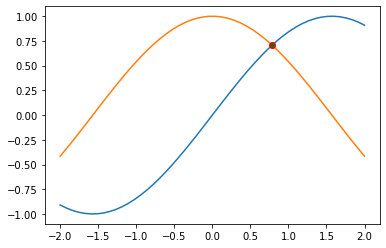

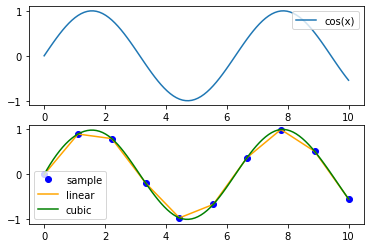

In [1]:
#Start Code

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.interpolate as sp

##find ssolution
function = lambda x: x+10
solution = fsolve(function,0)
print(solution)


##plot for intersection
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x: fun1(x) - fun2(x),x0)

result = findIntersection(np.sin,np.cos,0.0)
#print(result)
x = np.linspace(-2,2,50)
plt.plot(x,np.sin(x),x,np.cos(x),result,np.sin(result),"ro",result,np.cos(result),"g.")
plt.show()


##interpolate
x = np.linspace(0,10,100)
y = np.sin(x)
sampleX=np.linspace(0,10,10)
sampleY=np.sin(sampleX)

linIn = sp.interp1d(sampleX,sampleY,kind="linear")
cubIn = sp.interp1d(sampleX,sampleY,kind="cubic")
xNew = np.linspace(0,10,100)
linY = linIn(xNew)
cubY = cubIn(xNew)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x,y,label="cos(x)")
ax2.plot(sampleX,sampleY,"o",color="blue",label="sample")
ax2.plot(xNew,linY,label="linear",color="orange")
ax2.plot(xNew,cubY,label="cubic",color="green")

ax1.legend(loc="upper right")
ax2.legend(loc="lower left")


#End Code

## Activity 3

Find the difference between the numerical solution and analytical for the previous example having function as “func” in the limit (0,5) respectively. (2pt)

your results should be:

- fsolution=5.100345067540932
- dsolution=5.093314597966794
- The difference is 0.00703046957413811

In [2]:
#Start Code

from scipy.integrate import quad
from scipy.integrate import trapz

##analytical
func = lambda x: np.sin(x) * np.cos(x **2)+1
fsol = quad(func,0,5)
print("fsolution="+str(fsol[0]))

##numerical
x = np.sort(np.random.randn(150)*4+4).clip(0,5)
func1 = lambda x: np.sin(x) * np.cos(x **2)+1
y = func1(x)
dsol=trapz(y,x=x)
print("dsolution="+str(dsol))

print("The difference is +"+str(np.abs(fsol[0]-dsol)))

#End Code

fsolution=5.100345067540932
dsolution=5.096281985980504
The difference is +0.004063081560428117


## Activity 4

- Find the mean and standard deviation and three moments of normal distribution having loc = -1, scale =2 (3pts)
- Draw 1000 random sample from the distribution with same loc and scale values and plot their histogram. (3pts)
- Fit the pdf of the distribution over histogram (4pts)

your output should look like the following:

![image5](images/image5.png)

mean: 		1.9519937398108353
stdev: 		-1.0932007817880403
moments(3): 	0.10397030929825656


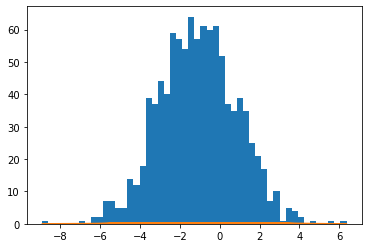

In [3]:
#Start Code

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import tmean
from scipy.stats import tstd
from scipy.stats import moment
import scipy.stats as stats

##statistics
data = norm.rvs(size = 1000,loc=-1,scale=2)

print("mean: \t\t"+str(tstd(data)))
print("stdev: \t\t"+str(tmean(data)))
print("moments(3): \t"+str(moment(data,moment=3)))

#help(norm.rvs)
#help(norm.std)
#help(norm.std)
#help(norm.moment)

##histogram
plt.hist(data,bins=50)

##pdf
plt.plot(data,norm.pdf(data,loc=-1,scale=2))

#End Code

## Activity 5

Repeat the K-means clustering algo with 3 clusters and plot it. (5pt)

Your result should look like something like this, though it will vary due to the randomness of the data being generated:

![image6](images/image6.png)


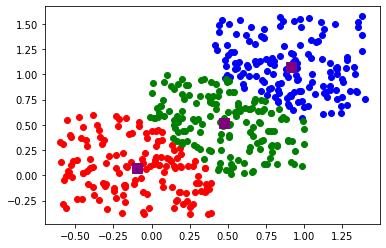

In [4]:
#Start Code

#import scipy.cluster.vq as cl
from scipy.cluster.vq import kmeans,vq
import numpy as np

def giveR():
    return np.random.rand(150,2)

d1 = giveR()
d2 = giveR() + np.array([0.4,0.6])
d3 = giveR() - np.array([0.6,0.4])
data = np.vstack((d1,d2,d3))

centroids, distortion = kmeans(data,3)
idx,distortion1 = vq(data,centroids)

plt.plot(data[idx==0,0],data[idx==0,1],'bo',
data[idx==1,0],data[idx==1,1],'ro',
data[idx==2,0],data[idx==2,1],'go')
plt.plot(centroids[:,0],centroids[:,1],"sg",markersize=10, color="purple")

#End Code

## Activity 6
Play with picture and try to covert it in the following format and plot it (10pt)

Hint1: second image is almost 1/4th of the figure

Hint2: 5th image is without reshaping

![image](images/Image.png)


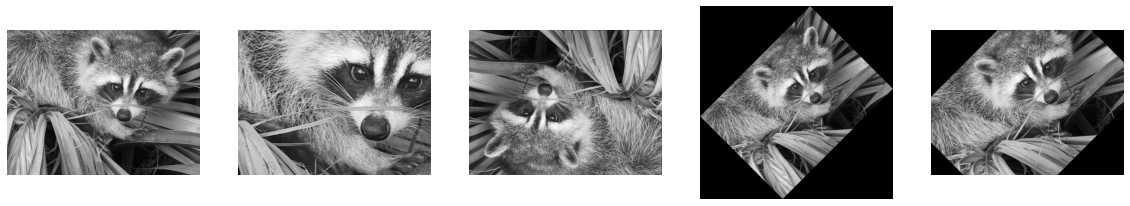

In [17]:
#Start Code

import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from scipy import ndimage

#set figure
fig = plt.figure(figsize=(20, 5))

#default
f = misc.face(gray=True)
ax1 = fig.add_subplot(151)
ax1.axis("off")
ax1.imshow(f,cmap = plt.cm.gray)

#zoomed
lx, ly = f.shape
#print(lx)
#print(ly)

minR = int(1*lx/4)
maxR = int(3*lx/4)
minC = int(1*ly/4)
maxC = int(3*ly/4)

ax2 = fig.add_subplot(152)
ax2.axis("off")
ax2.imshow(f[minR:maxR, minC:maxC],cmap = plt.cm.gray)

#lx, ly = face.shape
#X,Y = np.ogrid[0:lx,0:ly]

#x=0
#y=0
#for i in range(lx):
#    if(i>(1*(lx/4)) and i<(3*(lx/4))):
#        x+=1
#for j in range(ly):
#    if(j>(1*ly/4) and j<(3*(ly/4))):
#        y+=1
#        
#mask = np.zeros((x, y))
#
#xx=0
##yy=0
#for i in range(lx):
#    for j in range(ly):
#        if(i>(1*(lx/4)) and i<(3*(lx/4))):
#            if(j>(1*(ly/4)) and j<(3*(ly/4))):
#                mask[xx,yy] = face[i,j]
#                yy+=1
#            xx+=1            
#plt.imshow(mask,cmap = plt.cm.gray)

#mirrored
f = misc.face(gray=True)
lx, ly = f.shape
rotate = ndimage.rotate(f, 180)

ax3 = fig.add_subplot(153)
ax3.axis("off")
ax3.imshow(rotate,cmap = plt.cm.gray)

#tilted
f = misc.face(gray=True)
rotate = ndimage.rotate(f,45)

ax4 = fig.add_subplot(154)
ax4.axis("off")
ax4.imshow(rotate,cmap = plt.cm.gray)

#tilted with the same size
f = misc.face(gray=True)
rotate = ndimage.rotate(f,45,reshape=False)

ax5 = fig.add_subplot(155)
ax5.axis("off")
ax5.imshow(rotate,cmap = plt.cm.gray)

#End Code